## ***2023 Brain Age Predition - iFLYTEK A.I. Developer Competition***

In [8]:
!pip uninstall matplotlib

In [1]:
import pandas as pd
import numpy as np
import sklearn
import torch

import missingno as msno

In f:\Anaconda\ANA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In f:\Anaconda\ANA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In f:\Anaconda\ANA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In f:\Anaconda\ANA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In f:\Anaconda\ANA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

#### ***1 Load Dataset***

***This Dataset contains 12 csv files, which come from MRI scanner.***

***This part aims to load the dataset and use pre-process methods to construct data features***

In [2]:
data_path_1 = r'data/train/lh.MeanCurv - 1600.csv'
data_path_2 = r'data/train/lh.GausCurv - 1600.csv'
data_path_3 = r'data/train/rh.MeanCurv- 1600.csv'
data_path_4 = r'data/train/rh.GausCurv- 1600.csv'

data_path_5 = r'data/train/lh.ThickAvg - 1600.csv'
data_path_6 = r'data/train/lh.SurfArea - 1600.csv'
data_path_7 = r'data/train/rh.ThickAvg- 1600.csv'
data_path_8 = r'data/train/rh.SurfArea - 1600.csv'

data_path_9 = r'data/train/lh.GrayVol - 1600.csv'
data_path_10 = r'data/train/rh.GrayVol- 1600.csv'

data_path_11 = r'data/train/wmparc - 1600.csv'
data_path_12 = r'data/train/aseg - 1600.csv'

label_path = r'data/train/subject_info - 1600.csv'

original_x1, original_x2, original_x3, original_x4, original_y = pd.read_csv(data_path_1), pd.read_csv(data_path_2), pd.read_csv(data_path_3), pd.read_csv(data_path_4), pd.read_csv(label_path)
original_x5, original_x6, original_x7, original_x8 = pd.read_csv(data_path_5), pd.read_csv(data_path_6), pd.read_csv(data_path_7), pd.read_csv(data_path_8)
original_x9, original_x10 = pd.read_csv(data_path_9), pd.read_csv(data_path_10)
original_x11, original_x12 = pd.read_csv(data_path_11), pd.read_csv(data_path_12)

# drop the label numbers
original_x1, original_x2, original_x3, original_x4 = original_x1.iloc[:, 1:], original_x2.iloc[:,1:], original_x3.iloc[:,1:], original_x4.iloc[:, 1:]
original_x5, original_x6, original_x7, original_x8 = original_x5.iloc[:, 1:], original_x6.iloc[:,1:], original_x7.iloc[:,1:], original_x8.iloc[:, 1:]
original_x9, original_x10 = original_x9.iloc[:, 1:], original_x10.iloc[:, 1:]
original_x11, original_x12 = original_x11.iloc[:, 1:], original_x12.iloc[:, 1:]
original_y = original_y.iloc[:, 3]

In [10]:
import os 
import numpy as np

train_datafolder_path = 'data\\train'
test_datafolder_path = 'data\\test'

train_feature_dict = {}

for file_name in os.listdir(train_datafolder_path):
    data_path = os.path.join(train_datafolder_path, file_name)
    feature_df = pd.read_csv(data_path)
    feature_name = file_name[:file_name.find('-')]
    print(feature_name)

    if 'subject_info' in data_path:
        # get label colunm from y_dataframe
        label_df = np.array(feature_df.iloc[:, 3])
        train_feature_dict[feature_name] = label_df
    else:
        # drop the label numbers of x_dataframe
        feature_df = np.array(feature_df.iloc[:, 1:])
        train_feature_dict[feature_name] = feature_df

print(train_feature_dict)

aseg
lh.GausCurv
lh.GrayVol
lh.MeanCurv
lh.SurfArea
lh.ThickAvg
rh.GausCurv
rh.GrayVol
rh.MeanCurv
rh.SurfArea
rh.ThickAvg
subject_info
wmparc
{'aseg': array([[13706.1, 50274.2,  7559.5, ...,   536.1,   593.1,   723. ],
       [11981.9, 51047.5,  8563.6, ...,   846. ,   801.2,   721.8],
       [21259.1, 62010. ,  9594.8, ...,   934.6,   733. ,   814.4],
       ...,
       [15533.6, 52459.5,  8732. , ...,   673.4,   518.9,   786.2],
       [22349.1, 56921.2, 10410.8, ...,   735.1,   767.4,   681.2],
       [14960.6, 52991.5,  9163. , ...,   967.1,   964.7,   795.7]]), 'lh.GausCurv': array([[ 672, 2383, 2247, ..., 3923,  504, 1734],
       [ 764, 1936, 1613, ..., 3167,  359, 1513],
       [1022, 2761, 2302, ..., 4618,  485, 2301],
       ...,
       [1161, 2421, 2383, ..., 3738,  531, 1942],
       [1195, 3250, 2620, ..., 4129,  503, 2138],
       [ 884, 2511, 1798, ..., 3575,  536, 1774]], dtype=int64), 'lh.GrayVol': array([[ 1937,  7693,  4894, ..., 11654,  1150,  6138],
       [ 2368,

<AxesSubplot:>

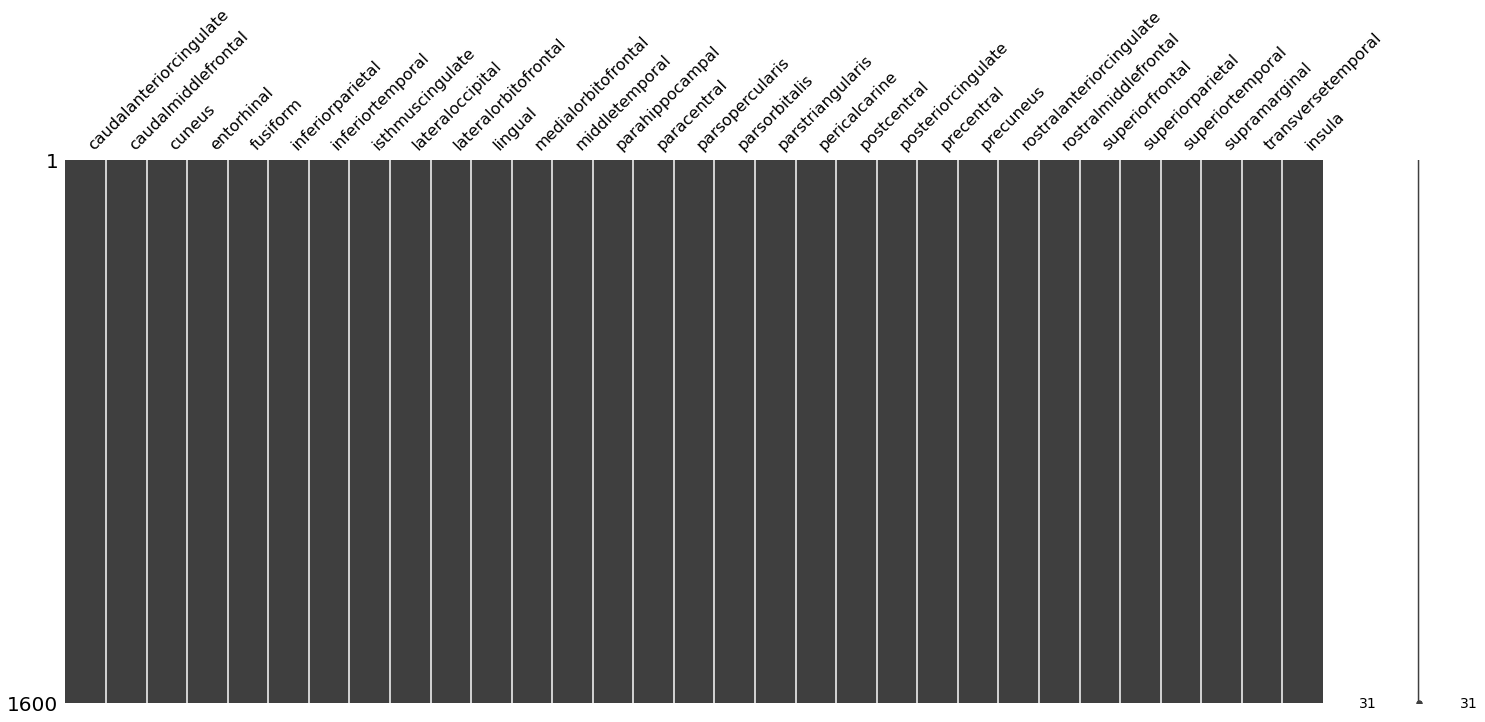

In [6]:
# use missingno to check the dataframe
msno.matrix(original_x1)

In [ ]:
from RVM import *


def train_data_preprocess():
    data_path_1 = r'data/train/lh.MeanCurv - 1600.csv'
    data_path_2 = r'data/train/lh.GausCurv - 1600.csv'
    data_path_3 = r'data/train/rh.MeanCurv- 1600.csv'
    data_path_4 = r'data/train/rh.GausCurv- 1600.csv'

    data_path_5 = r'data/train/lh.ThickAvg - 1600.csv'
    data_path_6 = r'data/train/lh.SurfArea - 1600.csv'
    data_path_7 = r'data/train/rh.ThickAvg- 1600.csv'
    data_path_8 = r'data/train/rh.SurfArea - 1600.csv'

    data_path_9 = r'data/train/lh.GrayVol - 1600.csv'
    data_path_10 = r'data/train/rh.GrayVol- 1600.csv'

    data_path_11 = r'data/train/wmparc - 1600.csv'
    data_path_12 = r'data/train/aseg - 1600.csv'

    label_path = r'data/train/subject_info - 1600.csv'

    original_x1, original_x2, original_x3, original_x4, original_y = pd.read_csv(data_path_1), pd.read_csv(data_path_2), pd.read_csv(data_path_3), pd.read_csv(data_path_4), pd.read_csv(label_path)
    original_x5, original_x6, original_x7, original_x8 = pd.read_csv(data_path_5), pd.read_csv(data_path_6), pd.read_csv(data_path_7), pd.read_csv(data_path_8)
    original_x9, original_x10 = pd.read_csv(data_path_9), pd.read_csv(data_path_10)
    original_x11, original_x12 = pd.read_csv(data_path_11), pd.read_csv(data_path_12)

    original_x1, original_x2, original_x3, original_x4 = original_x1.iloc[:, 1:], original_x2.iloc[:,1:], original_x3.iloc[:,1:], original_x4.iloc[:, 1:]
    original_x5, original_x6, original_x7, original_x8 = original_x5.iloc[:, 1:], original_x6.iloc[:,1:], original_x7.iloc[:,1:], original_x8.iloc[:, 1:]
    original_x9, original_x10 = original_x9.iloc[:, 1:], original_x10.iloc[:, 1:]
    original_x11, original_x12 = original_x11.iloc[:, 1:], original_x12.iloc[:, 1:]
    original_y = original_y.iloc[:, 3]

    # 目前经验是需要标准化
    original_x1 = (original_x1 - original_x1.min()) / (original_x1.max() - original_x1.min())
    original_x2 = (original_x2 - original_x2.min()) / (original_x2.max() - original_x2.min())
    original_x3 = (original_x3 - original_x3.min()) / (original_x3.max() - original_x3.min())
    original_x4 = (original_x4 - original_x4.min()) / (original_x4.max() - original_x4.min())
    original_x5 = (original_x5 - original_x5.min()) / (original_x5.max() - original_x5.min())
    original_x6 = (original_x6 - original_x6.min()) / (original_x6.max() - original_x6.min())
    original_x7 = (original_x7 - original_x7.min()) / (original_x7.max() - original_x7.min())
    original_x8 = (original_x8 - original_x8.min()) / (original_x8.max() - original_x8.min())
    original_x9 = (original_x9 - original_x9.min()) / (original_x9.max() - original_x9.min())
    original_x10 = (original_x10 - original_x10.min()) / (original_x10.max() - original_x10.min())
    original_x11 = (original_x11 - original_x11.min()) / (original_x11.max() - original_x11.min())
    original_x12 = (original_x12 - original_x12.min()) / (original_x12.max() - original_x12.min())


    original_x1, original_x2, original_x3, original_x4 = np.array(original_x1), np.array(original_x2), np.array(
        original_x3), np.array(original_x4)
    original_x5, original_x6, original_x7, original_x8 = np.array(original_x5), np.array(original_x6), np.array(
        original_x7), np.array(original_x8)
    original_x9, original_x10 = np.array(original_x9), np.array(original_x10)
    original_x11, original_x12 = np.array(original_x11), np.array(original_x12)
    original_y = np.array(original_y)

    original_x_thick = (original_x5 + original_x7) * 0.5
    original_x_gauscurv = (original_x2 + original_x4) * 0.5
    original_x_meancurv = (original_x1 + original_x3) * 0.5
    original_x_surfarea = (original_x6 + original_x8) * 0.5
    original_x_grayvol = (original_x9 + original_x10) * 0.5
    original_x_wmparc = original_x11
    original_x_aseg = original_x12

    # original_x = np.hstack([original_x_thick, original_x_gauscurv, original_x_meancurv, original_x_surfarea, original_x_grayvol, original_x_wmparc, original_x_aseg])
    # original_x = np.hstack([original_x1, original_x2, original_x3, original_x4, original_x5, original_x6, original_x7, original_x8])
    original_x = np.hstack(
        [original_x_thick, original_x_gauscurv, original_x_meancurv, original_x_surfarea, original_x_grayvol,
         original_x_wmparc, original_x_aseg, original_x1, original_x2, original_x3, original_x4, original_x5,
         original_x6, original_x7, original_x8, original_x9, original_x10])

    return original_x, original_y


def test_data_preprocess():
    data_path_1 = r'data/test/lh.MeanCurv- 389.csv'
    data_path_2 = r'data/test/lh.GausCurv- 389.csv'
    data_path_3 = r'data/test/rh.MeanCurv- 389.csv'
    data_path_4 = r'data/test/rh.GausCurv- 389.csv'

    data_path_5 = r'data/test/lh.ThickAvg- 389.csv'
    data_path_6 = r'data/test/lh.SurfArea - 389.csv'
    data_path_7 = r'data/test/rh.ThickAvg- 389.csv'
    data_path_8 = r'data/test/rh.SurfArea - 389.csv'

    data_path_9 = r'data/test/lh.GrayVol - 389.csv'
    data_path_10 = r'data/test/rh.GrayVol- 389.csv'

    data_path_11 = r'data/test/wmparc - 389.csv'
    data_path_12 = r'data/test/aseg - 389.csv'

    # label_path = r'data/test/subject_info - 389.csv'

    original_x1, original_x2, original_x3, original_x4 = pd.read_csv(data_path_1), pd.read_csv(
        data_path_2).dropna(), pd.read_csv(data_path_3), pd.read_csv(data_path_4).dropna()
    original_x5, original_x6, original_x7, original_x8 = pd.read_csv(data_path_5), pd.read_csv(
        data_path_6), pd.read_csv(data_path_7), pd.read_csv(data_path_8)
    original_x9, original_x10 = pd.read_csv(data_path_9), pd.read_csv(data_path_10)
    original_x11, original_x12 = pd.read_csv(data_path_11), pd.read_csv(data_path_12)

    original_x1, original_x2, original_x3, original_x4 = original_x1.iloc[:, 1:], original_x2.iloc[:,1:], original_x3.iloc[:,1:], original_x4.iloc[:, 1:]
    original_x5, original_x6, original_x7, original_x8 = original_x5.iloc[:, 1:], original_x6.iloc[:,1:], original_x7.iloc[:,1:], original_x8.iloc[:, 1:]
    original_x9, original_x10 = original_x9.iloc[:, 1:], original_x10.iloc[:, 1:]
    original_x11, original_x12 = original_x11.iloc[:, 1:], original_x12.iloc[:, 1:]
    # original_y = original_y.iloc[:, 3]

    # 目前经验是需要标准化
    original_x1 = (original_x1 - original_x1.min()) / (original_x1.max() - original_x1.min())
    original_x2 = (original_x2 - original_x2.min()) / (original_x2.max() - original_x2.min())
    original_x3 = (original_x3 - original_x3.min()) / (original_x3.max() - original_x3.min())
    original_x4 = (original_x4 - original_x4.min()) / (original_x4.max() - original_x4.min())
    original_x5 = (original_x5 - original_x5.min()) / (original_x5.max() - original_x5.min())
    original_x6 = (original_x6 - original_x6.min()) / (original_x6.max() - original_x6.min())
    original_x7 = (original_x7 - original_x7.min()) / (original_x7.max() - original_x7.min())
    original_x8 = (original_x8 - original_x8.min()) / (original_x8.max() - original_x8.min())
    original_x9 = (original_x9 - original_x9.min()) / (original_x9.max() - original_x9.min())
    original_x10 = (original_x10 - original_x10.min()) / (original_x10.max() - original_x10.min())
    original_x11 = (original_x11 - original_x11.min()) / (original_x11.max() - original_x11.min())
    original_x12 = (original_x12 - original_x12.min()) / (original_x12.max() - original_x12.min())

    original_x1, original_x2, original_x3, original_x4 = np.array(original_x1), np.array(original_x2), np.array(
        original_x3), np.array(original_x4)
    original_x5, original_x6, original_x7, original_x8 = np.array(original_x5), np.array(original_x6), np.array(
        original_x7), np.array(original_x8)
    original_x9, original_x10 = np.array(original_x9), np.array(original_x10)
    original_x11, original_x12 = np.array(original_x11), np.array(original_x12)

    # Linear Combination of features
    original_x_thick = (original_x5 + original_x7) * 0.5
    original_x_gauscurv = (original_x2 + original_x4) * 0.5
    original_x_meancurv = (original_x1 + original_x3) * 0.5
    original_x_surfarea = (original_x6 + original_x8) * 0.5
    original_x_grayvol = (original_x9 + original_x10) * 0.5
    original_x_wmparc = original_x11
    original_x_aseg = original_x12

    # Feature Blending
    original_x = np.hstack(
        [original_x_thick, original_x_gauscurv, original_x_meancurv, original_x_surfarea, original_x_grayvol,
         original_x_wmparc, original_x_aseg, original_x1, original_x2, original_x3, original_x4, original_x5,
         original_x6, original_x7, original_x8, original_x9, original_x10])

    return original_x


def write_submission(prediction_list, submit_name):
    ori_submission_path = r'subject_info - 389.csv'

    predict_df = pd.read_csv(ori_submission_path, encoding='gbk')
    predict_df['年龄'] = prediction_list

    print('\nSumission CSV Preview')
    print(predict_df.head(10))
    predict_df.to_csv(submit_name + '.csv')

    print('Successfully Build a Submission CSV File')


### ***2 Models***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from RVM import *

In [ ]:
train_original_x, train_original_y = train_data_preprocess()
test_original_x = test_data_preprocess()

# 将数据集分为训练集和测试集
X_train, X_valid, y_train, y_valid = train_test_split(train_original_x, train_original_y, test_size=0.3, random_state=0)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_valid = torch.tensor(X_train, dtype=torch.float32)
y_valid = torch.tensor(y_train, dtype=torch.float32)
test_original_x = torch.tensor(test_original_x, dtype=torch.float32)

# RVR
print('\n RVR Model')

linear_model = RVR(kernel="linear")
linear_model.fit(X_train, y_train)
linear_model_valid_prediction = linear_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in linear_model_valid_prediction])))
print('VALID Variance {}'.format(np.var([int(i) for i in linear_model_valid_prediction])))
linear_model_test_prediction = linear_model.predict(test_original_x)
print([int(i) for i in linear_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in linear_model_test_prediction])))

rbf_model = RVR(kernel="rbf")
rbf_model.fit(X_train, y_train)
rbf_model_valid_prediction = rbf_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in rbf_model_valid_prediction])))
print('VALID Variance {}'.format(np.var([int(i) for i in rbf_model_valid_prediction])))
rbf_model_test_prediction = rbf_model.predict(test_original_x)
print([int(i) for i in rbf_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in rbf_model_test_prediction])))

poly_model = RVR(kernel="poly")
poly_model.fit(X_train, y_train)
poly_model_valid_prediction = poly_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in poly_model_valid_prediction])))
print('VALID Variance {}'.format(np.var([int(i) for i in poly_model_valid_prediction])))
poly_model_test_prediction = rbf_model.predict(test_original_x)
print([int(i) for i in poly_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in poly_model_test_prediction])))

# 随机森林
print('\n RandomForest Model')

rf_model = RandomForestRegressor(n_estimators=12, random_state=0)
rf_model.fit(X_train, y_train)
rf_model_valid_prediction = rf_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in rf_model_valid_prediction])))
print('VALID Variance {}'.format(np.var([int(i) for i in rf_model_valid_prediction])))
rf_model_test_prediction = rf_model.predict(test_original_x)
print([int(i) for i in rf_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in rf_model_test_prediction])))

# Bagging
print('\n Bagging Model')

bag_model = BaggingRegressor()
bag_model.fit(X_train, y_train)
bag_model_valid_prediction = bag_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in bag_model_valid_prediction])))
print('VALID Variance {}'.format(np.var([int(i) for i in bag_model_valid_prediction])))
bag_model_test_prediction = bag_model.predict(test_original_x)
print([int(i) for i in bag_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in bag_model_test_prediction])))

# XGBoost
print('\n XGBoost Model')

xgb_model = XGBRegressor(learning_rate=0.2)
xgb_model.fit(X_train, y_train)
xgb_model_valid_prediction = xgb_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in xgb_model_valid_prediction])))
print('LABEL Variance {}'.format(np.var([int(i) for i in y_valid])))
print('VALID Variance {}'.format(np.var([int(i) for i in xgb_model_valid_prediction])))
xgb_model_test_prediction = xgb_model.predict(test_original_x)
print([int(i) for i in xgb_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in xgb_model_test_prediction])))

# LightGBM
print('\n LightGBM Model')

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_model_valid_prediction = lgbm_model.predict(X_valid)
print('\nVALID MAE:{}'.format(mean_absolute_error(y_valid, [int(i) for i in lgbm_model_valid_prediction])))
print('LABEL Variance {}'.format(np.var([int(i) for i in y_valid])))
print('VALID Variance {}'.format(np.var([int(i) for i in lgbm_model_valid_prediction])))
lgbm_model_test_prediction = lgbm_model.predict(test_original_x)
print([int(i) for i in lgbm_model_test_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in lgbm_model_test_prediction])))

# 集成模型
print('\n Ensemble Model')

new_linear_pred, new_rbf_pred, new_poly_pred = [int(i) for i in linear_model_valid_prediction], [int(i) for i in rbf_model_valid_prediction], [int(i) for i in poly_model_valid_prediction]
new_rf_pred = [int(i) for i in rf_model_valid_prediction]
new_bag_pred = [int(i) for i in bag_model_valid_prediction]
new_xgb_pred = [int(i) for i in xgb_model_valid_prediction]
new_lgbm_pred = [int(i) for i in lgbm_model_valid_prediction]

# ensemble_prediction = [(i + j) / 2 for i, j in zip(new_rf_pred, new_rbf_pred)]
ensemble_prediction = [(i + j + k) / 3 for i, j, k in zip(new_xgb_pred, new_bag_pred, new_linear_pred)]
print('\nENSEMBLE VALID MAE:{}'.format(mean_absolute_error(y_valid, ensemble_prediction)))
print('ENSEMBLE VALID Variance {}'.format(np.var([int(i) for i in ensemble_prediction])))

test_new_linear_pred, test_new_rbf_pred, test_new_poly_pred = [int(i) for i in linear_model_test_prediction], [
    int(i) for i in rbf_model_test_prediction], [int(i) for i in poly_model_test_prediction]
test_new_bag_pred = [int(i) for i in bag_model_test_prediction]
test_new_rf_pred = [int(i) for i in rf_model_test_prediction]
test_new_xgb_pref = [int(i) for i in xgb_model_test_prediction]

# test_ensemble_prediction = [(i + j) / 2 for i, j in zip(test_new_rf_pred, test_new_rbf_pred)]
test_ensemble_prediction = [(i + j + k) / 3 for i, j, k in
                            zip(test_new_xgb_pref, test_new_bag_pred, test_new_linear_pred)]
print([int(i) for i in test_ensemble_prediction])
print('TEST Variance {}'.format(np.var([int(i) for i in test_ensemble_prediction])))

# 写结果
# final_list = [int(i) for i in [int(i) for i in lgbm_model_test_prediction]]
# submission_version_name = 'Ensemble-DataAug3-XGBoost_Bagging_RVR'
# write_submission(final_list, submission_version_name)
